<a href="https://colab.research.google.com/github/surajekka/PGPAIML---Projects/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Project - Twitter US Airline Sentiment


### Description 
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from 
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed 
by categorizing negative reasons (such as "late flight" or "rude service").

### Objective:
To implement the techniques learnt as a part of the course.
 
### Data Description:

The dataset has the following columns:
tweet_id
airline_sentiment
airline_sentiment_confidence
negativereason
negativereason_confidence
airline
airline_sentiment_gold
name
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone

### Distribution:
Steps and tasks:
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row 
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and 
performance of your model on this dataset. (8 Marks)

Solution by : Suraj

In [1]:
!pip install contractions

     |████████████████████████████████| 266kB 29.3MB/s 
     |████████████████████████████████| 327kB 54.3MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85249 sha256=3a3d8c148990944f289a44d97c603e3a273a6ae9381a5d694ead327ab53bb17e
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [2]:
# install and import necessary libraries
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [4]:
project_path = '/gdrive/My Drive/NLP_Data/'

In [25]:
data_file = project_path + 'Tweets.csv'

In [26]:
data = pd.read_csv(data_file)

In [27]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


There are 14,640 tweets wrote by 7,701 Users

In [28]:
data.shape        


(14640, 15)

In [29]:
print(data.name.nunique())

7701


In [30]:
print (data["text"][10000])
print (data["text"][100])
print (data["text"][1000])
print (data["text"][14000])


@USAirways waiting all day at ATL since flight this am Cancelled Flightled. 1 standby told no seats and group of 15 shows up Late Flight and gets on to PHL
@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM
@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status should matter.
@AmericanAir Thanks for the reply, but a functioning plane four hours ago was the only way to do that. The staff was friendly, tho.


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [32]:
pd.isnull(data).sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

62.6% comments are negitive

In [33]:
data['airline_sentiment'].value_counts(True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

Most of the negitive comments are coming from customer service issues followed by late flight

In [34]:
data['negativereason'].value_counts(True)

Customer Service Issue         0.317063
Late Flight                    0.181412
Can't Tell                     0.129658
Cancelled Flight               0.092286
Lost Luggage                   0.078884
Bad Flight                     0.063195
Flight Booking Problems        0.057638
Flight Attendant Complaints    0.052408
longlines                      0.019394
Damaged Luggage                0.008063
Name: negativereason, dtype: float64

In [35]:
df=data.groupby(["airline","airline_sentiment"]).size().unstack()
print(df)

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


United has most number of negitive comments followed by US Airways. This may be due to the reason that these two airlines received most number of comments.

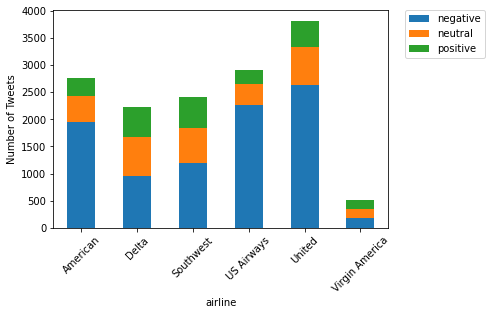

In [36]:
ax=df.plot.bar(stacked=True)
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Let's now see how the relative comments varies across different airlines

airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


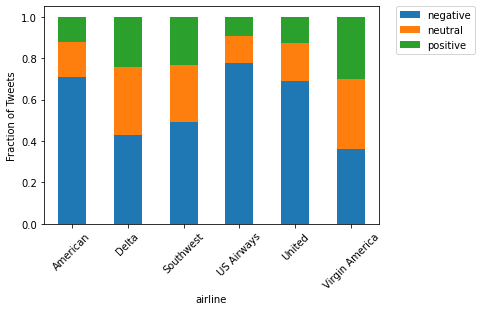

In [37]:
df=data.groupby(["airline","airline_sentiment"]).size().unstack()
df=df.div(df.sum(axis=1),axis='index')
print(df)
ax=df.plot.bar(stacked=True)
plt.ylabel('Fraction of Tweets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Looks like, relatively most negitive comments are coming in for US Airways followed by American

Finding reasons for negitive comments

Most number of negitive comments are coming in because of the reason "*Customer Service issue*" followed by "*Late flight*"

Text(0, 0.5, 'Number of Tweets')

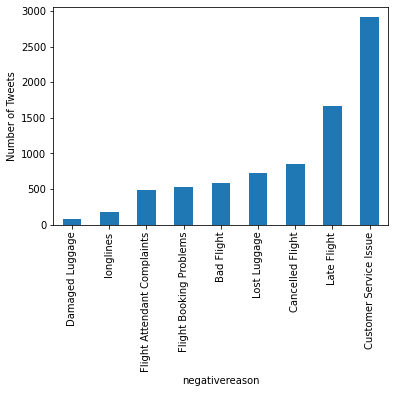

In [38]:
Tweet_negative=data[(data.airline_sentiment=="negative") & (data.negativereason !="Can't Tell")]
df=Tweet_negative.groupby(["negativereason"]).size().sort_values()
df.plot.bar()
plt.ylabel('Number of Tweets')

Finding out reasons of negitive comments among different airlines

Though the biggest reason of negitive comments is because of poor customer service but for Delta airlines the biggest reason is "Late FLight". United and southwest should also be concerned about the "lost Luggage".Apart from customer service, Virgin Airlines should also think about the "Flight booking problems" 

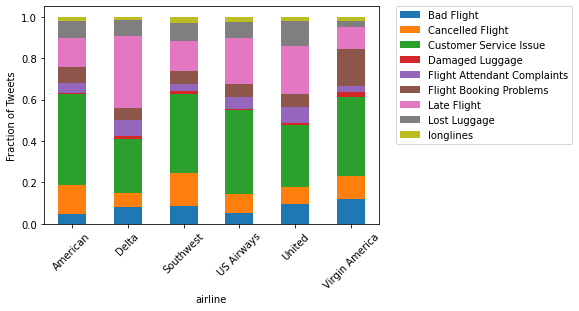

In [39]:
df=Tweet_negative.groupby(["airline","negativereason"]).size().unstack()
df=df.div(df.sum(axis=1),axis='index')
ax=df.plot.bar(stacked=True)
plt.ylabel('Fraction of Tweets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [40]:
from nltk.corpus import stopwords
print (stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

As given in the problem statement, dropping all features except text and sentiment

In [41]:
data_c = data.drop(["tweet_coord","negativereason_gold","airline_sentiment_gold","tweet_id","airline_sentiment_confidence","negativereason","negativereason_confidence","airline","name","retweet_count","tweet_created","tweet_location","user_timezone"], axis=1)


Basic Preprocessing Steps:
Conversion to lowercase.
Removal of punctuation.
Tokenization.
Stopwords removal except the word 'not'.

In [42]:
data_c.shape

(14640, 2)

In [43]:
data_c.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [44]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    from bs4 import BeautifulSoup
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters  
    import re      
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    letters_only = re.sub('((www\S+)|(http\S+))', 'urlsite', letters_only)
    letters_only = re.sub(r'\d+', 'contnum', letters_only)
    letters_only = re.sub(' +',' ', letters_only)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    stops.remove('not')               
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

In [45]:
print (data_c["text"][10000])
print (data_c["text"][100])
print (data_c["text"][1000])
print (data_c["text"][14000])

@USAirways waiting all day at ATL since flight this am Cancelled Flightled. 1 standby told no seats and group of 15 shows up Late Flight and gets on to PHL
@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM
@united how can you not put my bag on plane to Seattle. Flight 1212. Waiting  in line to talk to someone about my bag. Status should matter.
@AmericanAir Thanks for the reply, but a functioning plane four hours ago was the only way to do that. The staff was friendly, tho.


In [46]:
clean_review = review_to_words( data_c["text"][100] )
print (clean_review)

virginamerica trying add boy prince ressie sf thursday virginamerica lax http co gsb j c gm


In [50]:

data_c['clean_reviews']=data_c['text'].apply(lambda x: review_to_words(x))
train,test = train_test_split(data_c,test_size=0.30,random_state=0)

In [51]:
train.shape

(10248, 3)

In [52]:
train.head()

,airline_sentiment,text,clean_reviews
12647,positive,@AmericanAir no space in my seat but thanks to...,americanair space seat thanks pilots back mn e...
3652,negative,@united A change fee of $200. Same exact fligh...,united change fee exact flight atl hou charge ...
11570,negative,@USAirways Worst experience ever. Unable 2 hel...,usairways worst experience ever unable help ph...
1278,negative,@United how is it that I book a flight with a ...,united book flight reserved seat go check find...
6052,neutral,@SouthwestAir okay just signed up!,southwestair okay signed


In [53]:
test.head()

,airline_sentiment,text,clean_reviews
13983,negative,@AmericanAir In car gng to DFW. Pulled over 1h...,americanair car gng dfw pulled hr ago icy road...
14484,negative,"@AmericanAir after all, the plane didn’t land ...",americanair plane land identical worse conditi...
6403,negative,@SouthwestAir can't believe how many paying cu...,southwestair believe many paying customers lef...
9653,negative,@USAirways I can legitimately say that I would...,usairways legitimately say would rather driven...
13268,negative,@AmericanAir still no response from AA. great ...,americanair still response aa great job guys


In [54]:
test.shape

(4392, 3)

In [55]:

train_clean_review=[]
for data_c in train['clean_reviews']:
    train_clean_review.append(data_c)
test_clean_review=[]
for data_c in test['clean_reviews']:
    test_clean_review.append(data_c)

In [56]:
print(train_clean_review[10])

united updated flight delayed super frustrating


In [57]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 3000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(train_clean_review)
test_data_features = vectorizer.transform(test_clean_review)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
test_data_features = test_data_features.toarray()

Creating the bag of words...



In [58]:
print (train_data_features.shape)
print (test_data_features.shape)

(10248, 3000)
(4392, 3000)


In [59]:
vocab = vectorizer.get_feature_names()
print (vocab)

['aa', 'aadvantage', 'abc', 'ability', 'able', 'abq', 'absolute', 'absolutely', 'absurd', 'abt', 'ac', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accident', 'accidentally', 'accommodate', 'accommodating', 'accommodations', 'according', 'account', 'accounts', 'acct', 'accurate', 'acknowledge', 'across', 'act', 'action', 'actions', 'activities', 'actual', 'actually', 'ad', 'add', 'added', 'adding', 'additional', 'address', 'addressed', 'admiral', 'admirals', 'admit', 'advance', 'advantage', 'advice', 'advise', 'advisory', 'affected', 'afford', 'affordable', 'afternoon', 'age', 'agency', 'agent', 'agents', 'ago', 'agree', 'ah', 'ahead', 'ahold', 'air', 'airbus', 'aircanada', 'aircraft', 'airfare', 'airline', 'airlinegeeks', 'airlines', 'airplane', 'airport', 'airports', 'airways', 'alaska', 'albany', 'alert', 'alerts', 'ali', 'alive', 'alliance', 'allow', 'allowed', 'allowing', 'almost', 'alone', 'along', 'already', 'alright', 'also', 'alternate', 'although', 'always', 'a

In [60]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

203 aa
5 aadvantage
9 abc
3 ability
90 able
4 abq
14 absolute
23 absolutely
10 absurd
4 abt
4 ac
8 accept
21 acceptable
6 accepted
7 accepting
26 access
5 accident
4 accidentally
10 accommodate
5 accommodating
7 accommodations
8 according
52 account
4 accounts
10 acct
5 accurate
4 acknowledge
7 across
9 act
4 action
6 actions
3 activities
16 actual
54 actually
3 ad
63 add
16 added
10 adding
12 additional
30 address
5 addressed
4 admiral
7 admirals
3 admit
9 advance
13 advantage
7 advice
11 advise
17 advisory
5 affected
10 afford
3 affordable
22 afternoon
6 age
4 agency
185 agent
117 agents
96 ago
4 agree
11 ah
14 ahead
6 ahold
97 air
7 airbus
4 aircanada
22 aircraft
9 airfare
287 airline
3 airlinegeeks
106 airlines
14 airplane
257 airport
17 airports
66 airways
4 alaska
5 albany
6 alert
6 alerts
3 ali
5 alive
8 alliance
24 allow
21 allowed
11 allowing
68 almost
13 alone
13 along
134 already
9 alright
91 also
11 alternate
11 although
82 always
64 amazing
14 america
51 american
2087 amer

In [61]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [62]:

Classifiers = [
    LogisticRegression(C=0.000000001,multi_class='multinomial',max_iter=200,solver='sag'),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    BernoulliNB(binarize=None),
    MultinomialNB()]

In [63]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_data_features,train['airline_sentiment'])
        pred = fit.predict(test_data_features)
    except Exception:
        fit = classifier.fit(train_data_features,train['airline_sentiment'])
        pred = fit.predict(test_data_features)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy of LogisticRegressionis 0.6347905282331512
Accuracy of RandomForestClassifieris 0.7497723132969034
Accuracy of AdaBoostClassifieris 0.7213114754098361
Accuracy of BernoulliNBis 0.7777777777777778
Accuracy of MultinomialNBis 0.7807377049180327


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents

# create the transform
vector = TfidfVectorizer(max_features = 3000)
# tokenize and build vocab
Vtrain=vector.fit(train_clean_review)
VTtrain_features = Vtrain.transform(train_clean_review)

VTtest_features = vector.transform(test_clean_review)

# Numpy arrays are easy to work with, so convert the result to an 
# array
VTtrain_features = VTtrain_features.toarray()
VTtest_features = VTtest_features.toarray()

In [65]:
vocab_TF_IDF = vector.get_feature_names()
print (vocab_TF_IDF)

['aa', 'aadvantage', 'abc', 'ability', 'able', 'abq', 'absolute', 'absolutely', 'absurd', 'abt', 'ac', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accident', 'accidentally', 'accommodate', 'accommodating', 'accommodations', 'according', 'account', 'accounts', 'acct', 'accurate', 'acknowledge', 'across', 'act', 'action', 'actions', 'activities', 'actual', 'actually', 'ad', 'add', 'added', 'adding', 'additional', 'address', 'addressed', 'admiral', 'admirals', 'admit', 'advance', 'advantage', 'advice', 'advise', 'advisory', 'affected', 'afford', 'affordable', 'afternoon', 'age', 'agency', 'agent', 'agents', 'ago', 'agree', 'ah', 'ahead', 'ahold', 'air', 'airbus', 'aircanada', 'aircraft', 'airfare', 'airline', 'airlinegeeks', 'airlines', 'airplane', 'airport', 'airports', 'airways', 'alaska', 'albany', 'alert', 'alerts', 'ali', 'alive', 'alliance', 'allow', 'allowed', 'allowing', 'almost', 'alone', 'along', 'already', 'alright', 'also', 'alternate', 'although', 'always', 'a

In [66]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab_TF_IDF, dist):
    print (count, tag)

203 aa
5 aadvantage
9 abc
3 ability
90 able
4 abq
14 absolute
23 absolutely
10 absurd
4 abt
4 ac
8 accept
21 acceptable
6 accepted
7 accepting
26 access
5 accident
4 accidentally
10 accommodate
5 accommodating
7 accommodations
8 according
52 account
4 accounts
10 acct
5 accurate
4 acknowledge
7 across
9 act
4 action
6 actions
3 activities
16 actual
54 actually
3 ad
63 add
16 added
10 adding
12 additional
30 address
5 addressed
4 admiral
7 admirals
3 admit
9 advance
13 advantage
7 advice
11 advise
17 advisory
5 affected
10 afford
3 affordable
22 afternoon
6 age
4 agency
185 agent
117 agents
96 ago
4 agree
11 ah
14 ahead
6 ahold
97 air
7 airbus
4 aircanada
22 aircraft
9 airfare
287 airline
3 airlinegeeks
106 airlines
14 airplane
257 airport
17 airports
66 airways
4 alaska
5 albany
6 alert
6 alerts
3 ali
5 alive
8 alliance
24 allow
21 allowed
11 allowing
68 almost
13 alone
13 along
134 already
9 alright
91 also
11 alternate
11 although
82 always
64 amazing
14 america
51 american
2087 amer

In [67]:
Classifiers = [
    LogisticRegression(C=0.000000001,multi_class='multinomial',max_iter=200,solver='sag',n_jobs=4),
    RandomForestClassifier(n_estimators=200,n_jobs=4),
    AdaBoostClassifier(n_estimators = 250),
    BernoulliNB(binarize=None),
    MultinomialNB()]

In [68]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(VTtrain_features,train['airline_sentiment'])
        pred = fit.predict(VTtest_features)
    except Exception:
        fit = classifier.fit(VTtrain_features,train['airline_sentiment'])
        pred = fit.predict(VTtest_features)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

Accuracy of LogisticRegressionis 0.6347905282331512
Accuracy of RandomForestClassifieris 0.75591985428051
Accuracy of AdaBoostClassifieris 0.7331511839708561
Accuracy of BernoulliNBis 0.7231329690346083
Accuracy of MultinomialNBis 0.7395264116575592


Tried both Count vectorizer and Tf_IDF vectorizer. For sentiment analysis of comments made by users on tweeter for different airlines. Best accuracy is observed in using count verctor optimizer algorithium used multi class clissification 73.9%